## Near field: Rayleigh-Sommerfeld approach

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

## X scheme

### Amplification of the field

The Rayleigh-Sommefeld implementation allows an amplification of the field since, sometimes, light diverges. Processing time increases approximately linearly with amplification number.

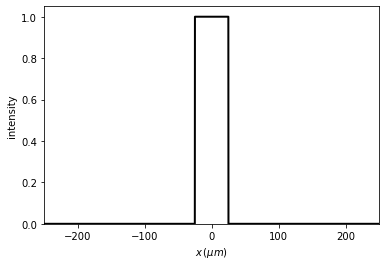

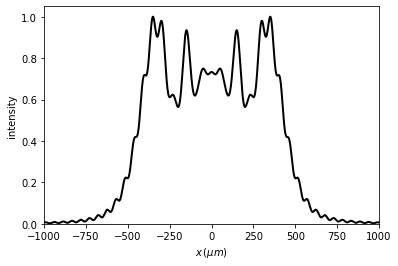

In [2]:
wavelength=0.5*um
x0=np.linspace(-0.25*mm, 0.25*mm, 1024*8)

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info='u0')
u0.spherical_wave(A=1, x0=0, z0=-0.25*mm)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info='t0')
t0.slit(x0=0, size=50*um)
t0.draw(kind='intensity')

u1=t0*u0

t2=u1.RS(z=5*mm, amplification=4, verbose=False)
t2.normalize()
t2.draw(kind='intensity')

### Reduction of the field

There are some cases where we need to analyze the field in a small area, such as focus of a lens.

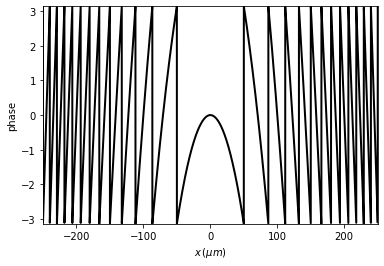

In [4]:

focal=5*mm

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info='u0')
u0.plane_wave(A=1, theta=0*degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info='t0')
t0.lens(x0=0, radius = 500*um, focal=focal, mask=False)
t0.draw(kind='phase')

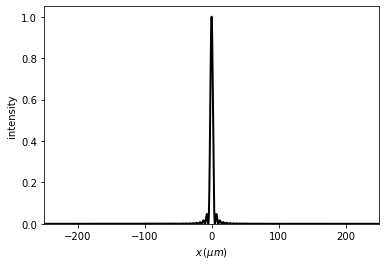

In [5]:
u1=t0*u0

t2=u1.RS(z=focal, verbose=False)
t2.normalize()
t2.draw(kind='intensity')

As we cannot see the details, we can use the cut_resample function in order to amplify the focusing zone.

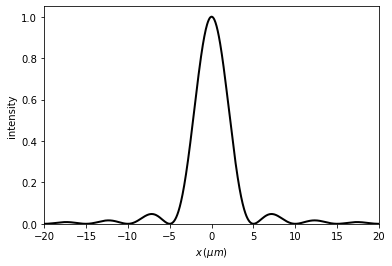

In [6]:
t2.cut_resample(x_limits=(-20*um,20*um), num_points=2048, new_field=False)
t2.draw(kind='intensity')